In [1]:
#Import everything
import os
import sys
import math
import numpy as np
import numpy.linalg
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import fcsparser

import os
import sys
import math
import numpy as np
import numpy.linalg
import pandas as pd

import ternary
from scipy.stats import multinomial

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import index_haps as idh
import index_flow as idf

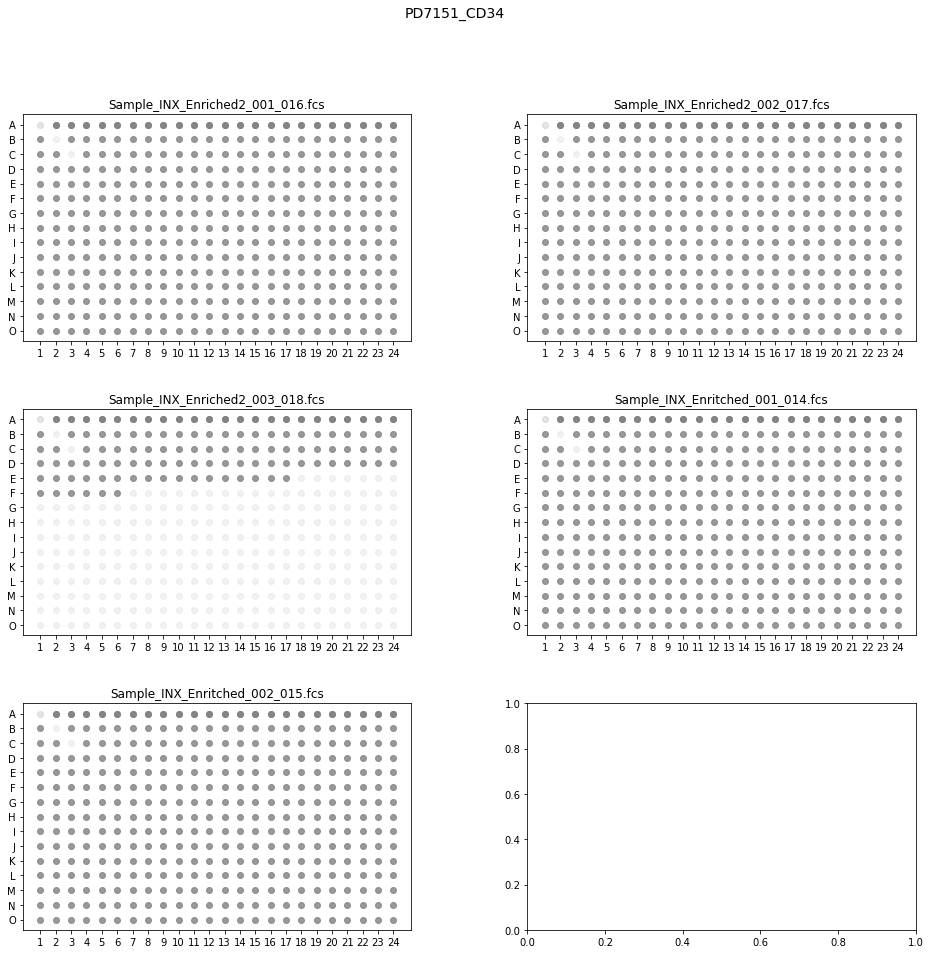

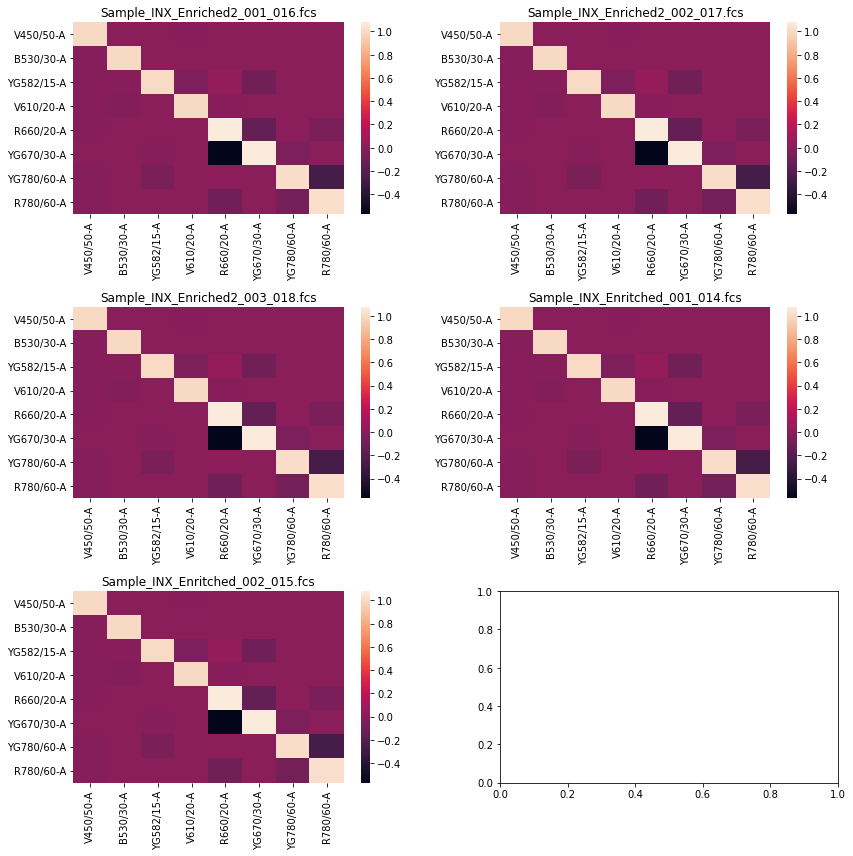

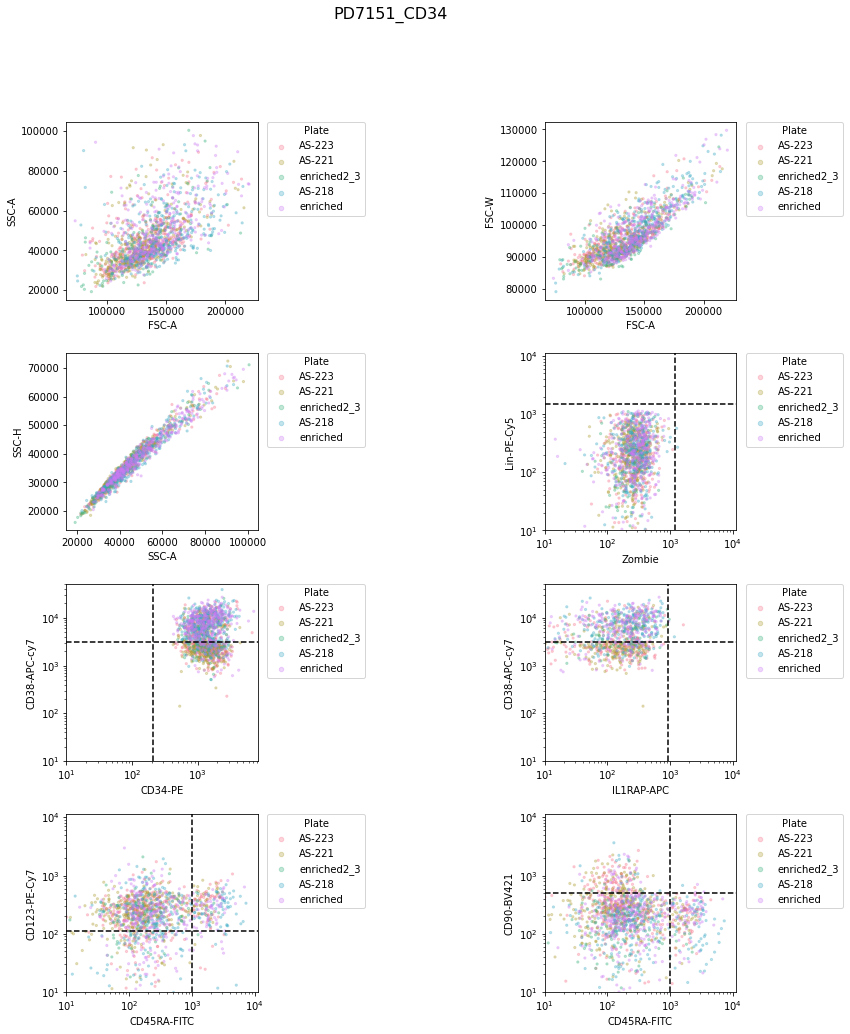

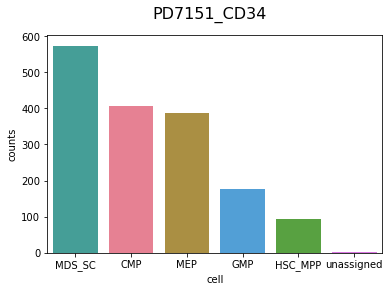

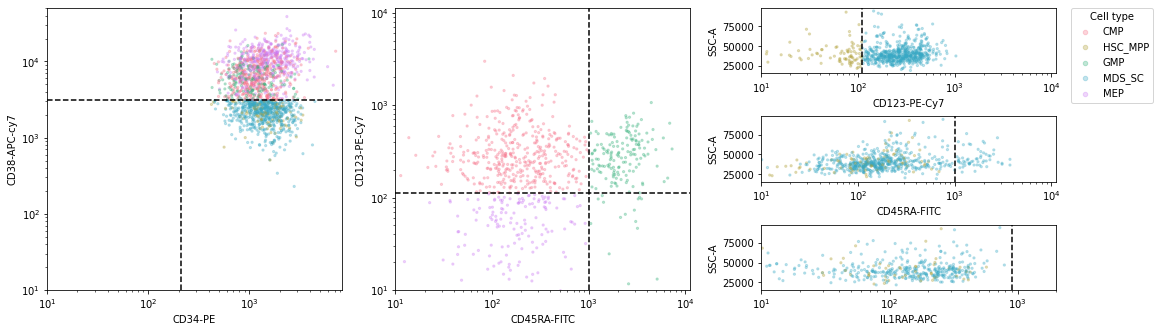

In [2]:
#PD7151 CD34 parameters

directory = '../Data/PD7151_BM/Indexed/'

#Make plate key - note one plate split over 2 index files
files = []
for filename in os.listdir(directory):
    files.append(filename)

plates = ['AS-223', 'AS-221','enriched2_3', 'AS-218', 'enriched'] 

plate_key = dict(zip(files, plates))

channel_key = {'YG582/15-A': 'CD34-PE', 
               'YG670/30-A': 'Lin-PE-Cy5', 
               'YG780/60-A': 'CD123-PE-Cy7', 
               'V450/50-A': 'CD90-BV421', 
               'V610/20-A': 'Zombie', 
               'B530/30-A': 'CD45RA-FITC', 
               'R660/20-A': 'IL1RAP-APC', 
               'R780/60-A': 'CD38-APC-cy7'
}

logs = ['Lin-PE-Cy5', 'CD34-PE','CD38-APC-cy7', 'CD45RA-FITC','CD123-PE-Cy7','Zombie', 'IL1RAP-APC', 'CD90-BV421' ]

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'Lin-PE-Cy5'], 
    ['CD34-PE', 'CD38-APC-cy7'],
    ['IL1RAP-APC', 'CD38-APC-cy7'],
    ['CD45RA-FITC', 'CD123-PE-Cy7'],
    ['CD45RA-FITC', 'CD90-BV421']
]
#Tweak for PD7151
gates = {
    'Lin-PE-Cy5': 1500,
    'CD34-PE': 200 ,
    'CD38-APC-cy7': 3100 ,  #3100 = 10% on Flowjo, 3700 = 15% 
    'CD45RA-FITC': 1000 ,
    'CD123-PE-Cy7': 100,
    'Zombie': 1200,
    'IL1RAP-APC': 900,  #set from FlowJo looking at unstained, not convinced this worked
    'CD90-BV421': 500
}


label = 'PD7151_CD34'
idf.plate_qc(directory, label)
source = idf.get_comp_data(directory, plate_key, channel_key, plot = True)
idf.flowplot_byplate(source, plot_list, logs, gates, label)
CD34assigned = idf.MDS_BM_celltype_assign(source, gates, label, save = False)
idf.flowplot_bycelltype(CD34assigned, plot_list, logs, gates,  label, plot = False, save = False)
idf.flowplot_bycelltype_gating(CD34assigned, logs, gates,  label, plot = True, save = True)

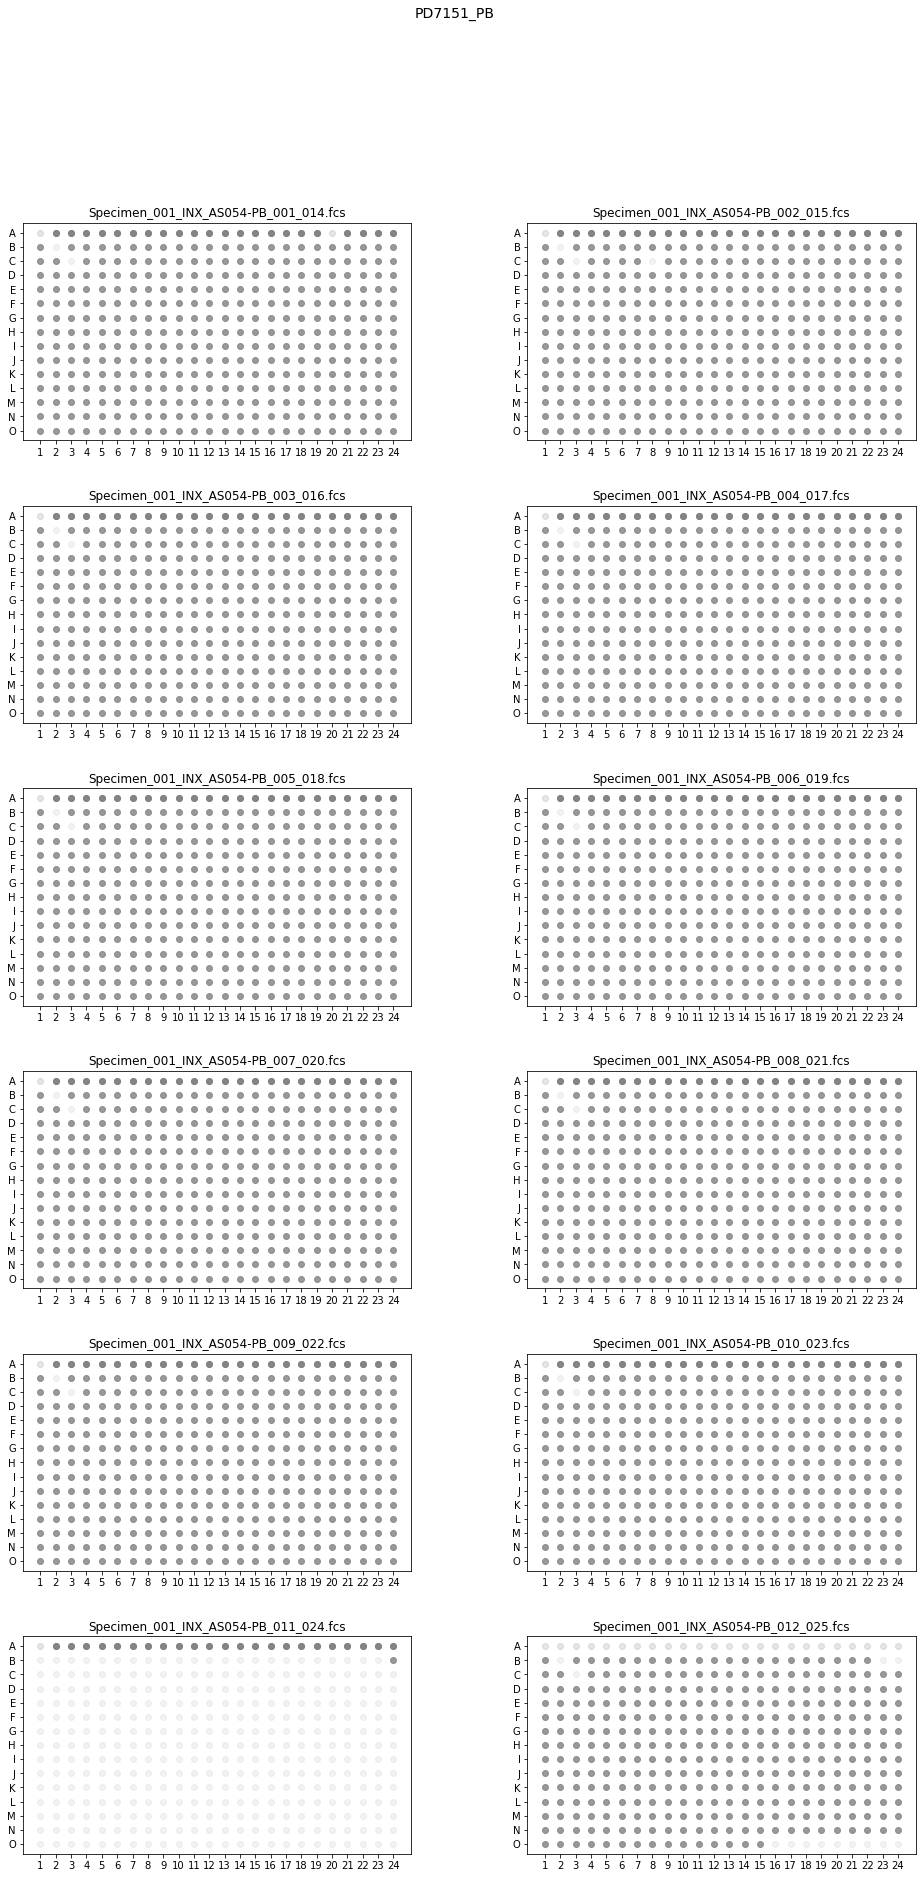

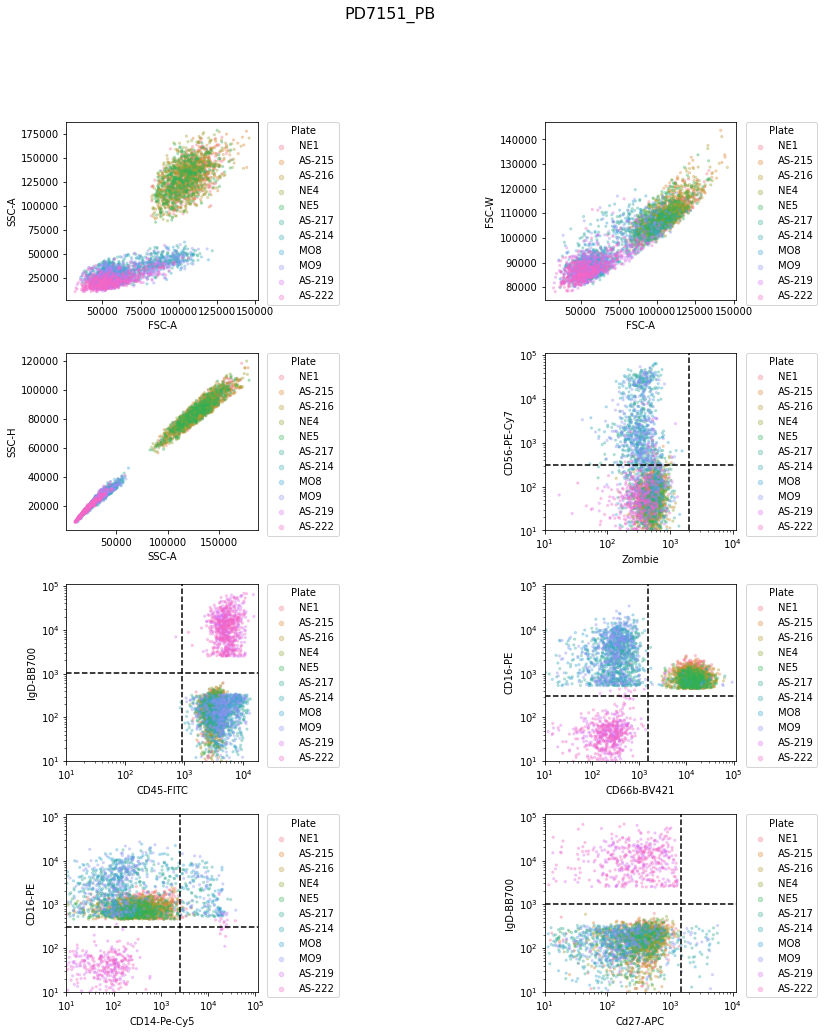

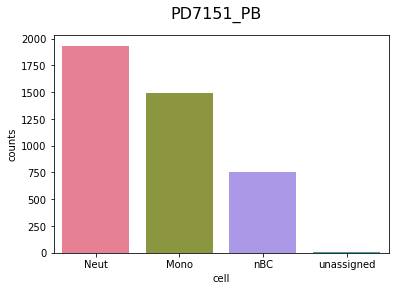

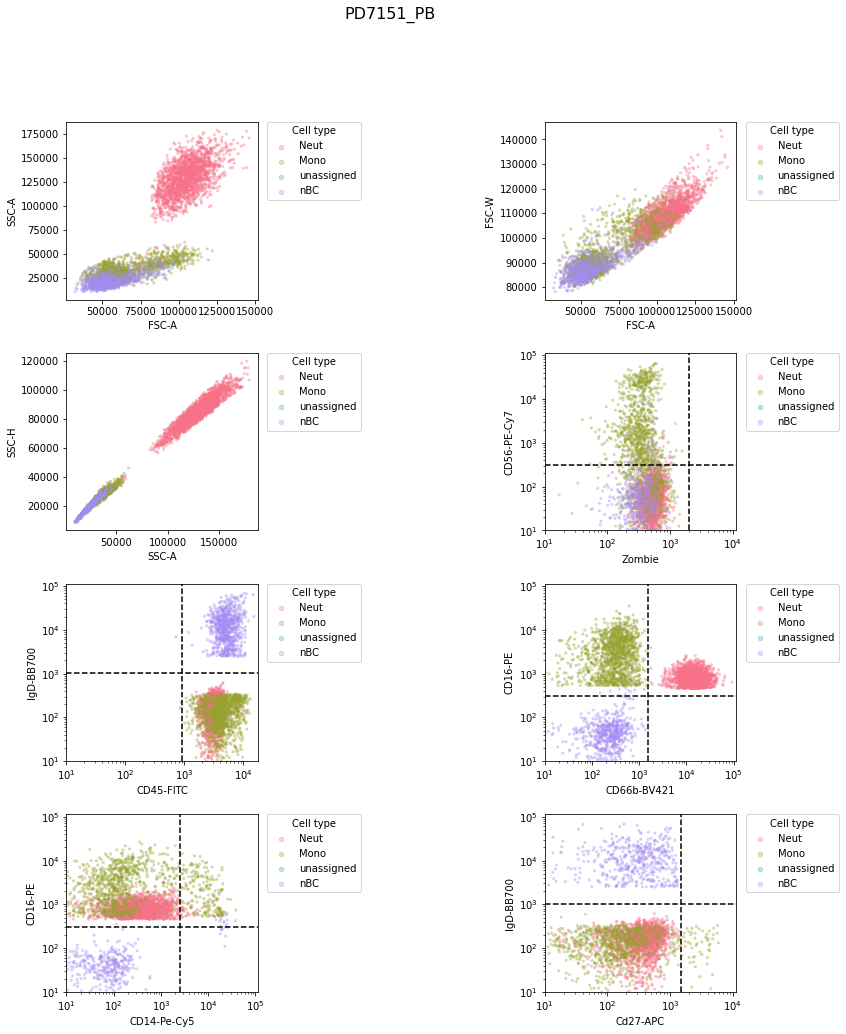

In [3]:
#PD7151 PB parameters

directory = '../Data/PD7151_PB/Indexed/'

#Make plate key - note one plate split over 2 index files
files = []
for filename in os.listdir(directory):
    files.append(filename)
    
plates = ['NE1',
 'AS-215',
 'AS-216',
 'NE4',
 'NE5',
 'AS-217',
 'AS-214',
 'MO8',
 'MO9',
 'AS-219',
 'AS-222a',
 'AS-222']

plate_key = dict(zip(files, plates))

channel_key = {
    'YG582/15-A': 'CD16-PE', 
    'YG670/30-A': 'CD14-Pe-Cy5', 
    'YG780/60-A': 'CD56-PE-Cy7', 
    'V450/50-A': 'CD66b-BV421', 
    'V610/20-A': 'Zombie', 
    'B530/30-A': 'CD45-FITC', 
    'B695/40-A': 'IgD-BB700', 
    'R660/20-A': 'Cd27-APC'
}

logs = ['CD16-PE', 'CD14-Pe-Cy5', 'CD56-PE-Cy7', 'CD66b-BV421', 'Zombie', 'CD45-FITC', 'Cd27-APC', 'R780/60-A', 'IgD-BB700']

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'CD56-PE-Cy7'], 
    ['CD45-FITC', 'IgD-BB700'],
    ['CD66b-BV421', 'CD16-PE'],
    ['CD14-Pe-Cy5', 'CD16-PE'],
    ['Cd27-APC', 'IgD-BB700']
]

gates = {
    'CD16-PE': 300,
    'CD14-Pe-Cy5': 2500 ,
    'CD56-PE-Cy7': 300 ,
    'CD66b-BV421': 1500 ,
    'Zombie': 2000,
    'CD45-FITC': 900,
    'Cd27-APC': 1500,
    'IgD-BB700': 1000,
    'R780/60-A':1000
}


label = 'PD7151_PB'
idf.plate_qc(directory, label)
source = idf.get_comp_data(directory, plate_key, channel_key, plot = False)
#Need to rename placeholder plate AS-222a, and reassign Plate_Well column
source['Plate'] = source['Plate'].replace({'AS-222a':'AS-222'})
source['Plate_Well'] = source['Plate'].astype(str) + '_' + source['Well'].astype(str)

idf.flowplot_byplate(source, plot_list, logs, gates,label)
PBassigned = idf.PB_celltype_assign(source, gates, label, save = False)
idf.flowplot_bycelltype(PBassigned, plot_list, logs, gates,  label, plot = True, save = False)

In [4]:
#Now combine everything into a single df that contains the celltype and flow data for each well
print('Number of CD34 wells (expect 1640) = ', len(CD34assigned))
print('Number of PB wells (expect 4179) = ',len(PBassigned))
PD7151_allcells_assigned = CD34assigned.append(PBassigned, ignore_index=True)
print('Total number of wells = ', len(PD7151_allcells_assigned))

Number of CD34 wells (expect 1640) =  1640
Number of PB wells (expect 4179) =  4179
Total number of wells =  5819


PD7151_2
Cells with 20 reads for 2 genes =  812


C:\Users\z3283497\python\Annatina\MDS_amplicons\Code\index_haps.py:445: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(h_pad = 1)


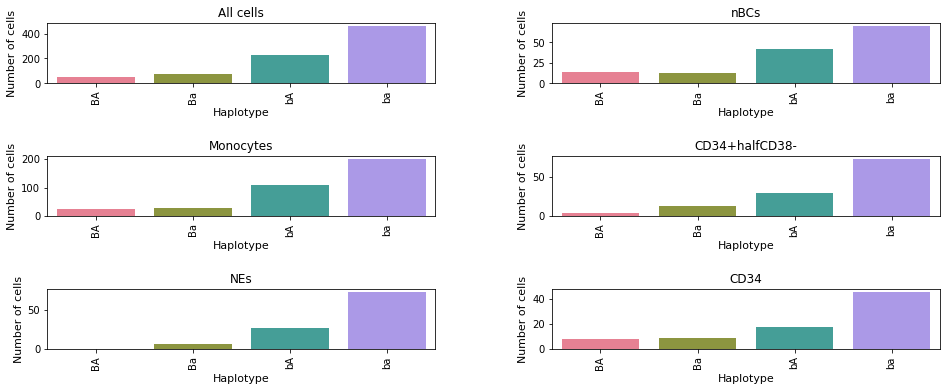

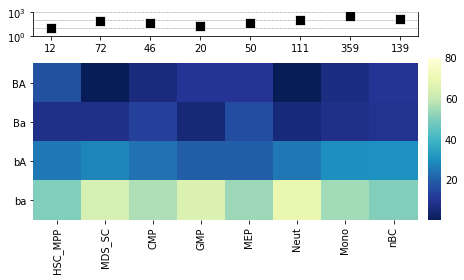

In [5]:
#And assign haplotypes
datafile = '../Data/Amp_data/allele_counts_anon.tsv'
metadata = '../Data/Amp_data/Amplicon_metadata_fixed_anon.xlsx'
pt_id = 'PD7151'
haps = 2
reads = 20
cutoff = 0.1
PD7151_plate = idh.data_retrieval(datafile, metadata, pt_id)
PD7151_haps = idh.call_haps(PD7151_plate, metadata, pt_id, haps, reads, cutoff) #hap number, read cut, proprtion mutated
PD7151_haps_indexed = pd.merge(PD7151_haps, PD7151_allcells_assigned, on = 'Plate_Well')
idh.plot_hap_dist_sort_type(PD7151_haps_indexed, pt_id, haps, reads, cutoff, save = True)
cell_number = idh.plot_index_heatmap_2(PD7151_haps_indexed, pt_id, haps, reads, cutoff, save = True)

In [6]:
#Drop nBC from following plots (not using for this patient, but leaving in case it's needed)
cell_number2 = cell_number.copy()
#if 'nBC' in cell_number2.columns:
#    cell_number2.drop(columns = 'nBC', inplace = True)

In [7]:
#How many WT cells for each type
k = cell_number2.loc[['BA', 'Ba', 'bA', 'ba']]
#How many mutated cells for each type
j = cell_number2.loc[['BA', 'bA', 'ba']]
j.sum(axis = 0)

celltype
HSC_MPP     11
MDS_SC      66
CMP         40
GMP         19
MEP         42
Neut       105
Mono       329
nBC        126
dtype: int64

In [8]:
#What is the proportion of mutated cells
y = cell_number2.loc[['BA', 'bA', 'ba']]
y = y*100/y.sum(axis = 0)
ct = y.index.get_level_values(0)
y

celltype,HSC_MPP,MDS_SC,CMP,GMP,MEP,Neut,Mono,nBC
Haplotype,,,,,,,,
BA,18.181818,0.00000,7.5,10.526316,11.904762,0.000000,7.598784,11.111111
bA,27.272727,30.30303,27.5,21.052632,23.809524,26.666667,32.522796,33.333333
ba,54.545455,69.69697,65.0,68.421053,64.285714,73.333333,59.878419,55.555556


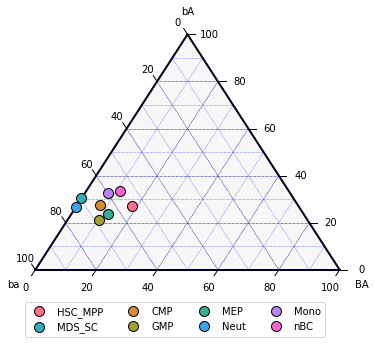

In [9]:
idh.tern_plot(y, pt_id, reads, cutoff)

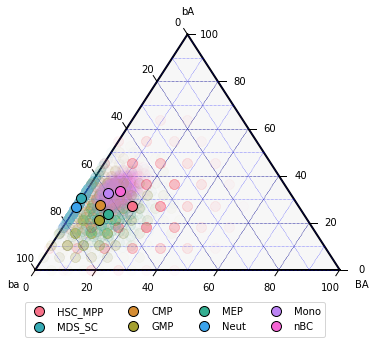

In [10]:
idh.tern_plot_cloud(y, j, pt_id, reads, cutoff)

<ipython-input-11-ab25baf9907d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PD7151small3['mut_no'] = PD7151small3['Haplotype'].replace(mut_no)


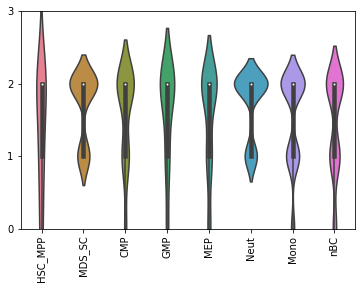

In [11]:
#Graphs to look at number of mutations per cell
PD7151small = PD7151_haps_indexed.loc[PD7151_haps_indexed['Haplotype'].isin(['BA', 'bA', 'ba'])]
mut_no = dict(zip(['BA', 'bA', 'ba'], [0,1,2,3])) 
PD7151small2 = PD7151small.loc[PD7151small['celltype'].isin(['HSC_MPP','CMP',  'GMP','MEP', 'MDS_SC',  'Neut', 'Mono','nBC'])]
PD7151small3 = PD7151small2[['Haplotype', 'celltype']]
PD7151small3['mut_no'] = PD7151small3['Haplotype'].replace(mut_no)

fig, ax = plt.subplots()
colors = sns.color_palette('husl', n_colors = 8)
sns.violinplot(x = 'celltype', y = 'mut_no', ax = ax, data = PD7151small3, palette = colors, order = ['HSC_MPP','MDS_SC','CMP',  'GMP', 'MEP',   'Neut', 'Mono','nBC'])
ax.set_ylim(0, 3)
ax.set_yticks([0,1,2,3])
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='x', labelrotation = 90)
fig.savefig('../Results/PD7151_no_muts_violin.png',bbox_inches='tight',dpi=300)

In [12]:
#Piecharts for figure 2
#Cell counts permitted haplotypes
cc = cell_number.loc[['BA', 'bA', 'ba']]
cc

celltype,HSC_MPP,MDS_SC,CMP,GMP,MEP,Neut,Mono,nBC
Haplotype,,,,,,,,
BA,2,0,3,2,5,0,25,14
bA,3,20,11,4,10,28,107,42
ba,6,46,26,13,27,77,197,70


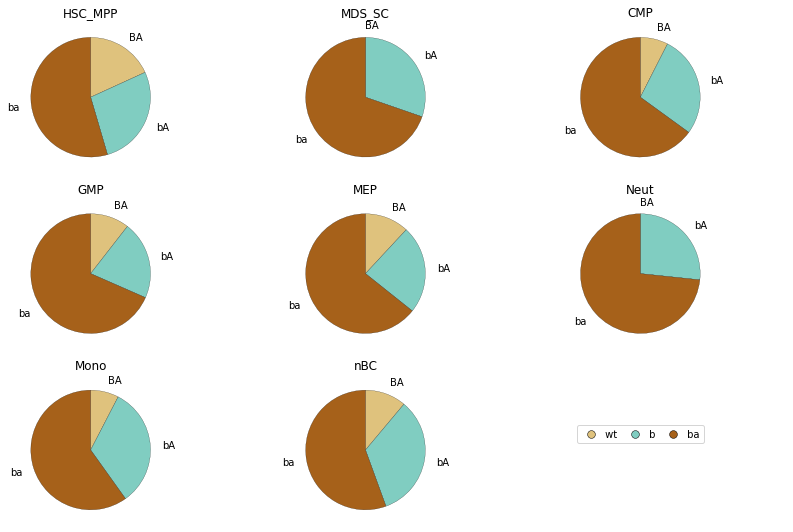

In [13]:
#Create proxy artists for legend
f,a = plt.subplots()
colors = ['#dfc27d', '#80cdc1', '#a6611a', '#018571']
lgdlabels = [' wt', ' b', ' ba']
lgdhandles = []
for i, lab in enumerate(lgdlabels):
    line = a.scatter([0], [0], label=lab, color=colors[i], s = 60, edgecolor = 'black', linewidth = 0.5) 
    lgdhandles.append(line)
plt.close(f)

#Plot data
fig, ax = plt.subplots(3, 3, figsize = (12, 7.5))
ax = ax.flatten()

for count, ct in enumerate(cc.columns):
    labels = cc.index.to_list()
    sizes = cc[ct].to_list()
    wedgeprops={'edgecolor':'black','linewidth': 0.2,  'antialiased': True}
    ax[count].pie(sizes, labels = labels, colors = colors, counterclock=False, startangle = 90, wedgeprops = wedgeprops, labeldistance = 1.2)
    ax[count].set_title(ct)

ax[8].set_axis_off()    
ax[8].legend(handles = lgdhandles, labels = lgdlabels, loc = 'upper center',bbox_to_anchor = [0.5,0.7], ncol = 3, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

fig.tight_layout() 
fig.savefig(f'../Results/{pt_id}_piecharts.svg',bbox_inches='tight', dpi = 600)
fig.savefig(f'../Results/{pt_id}_piecharts.png',bbox_inches='tight', dpi = 600)